# EE386 Digital Signal Processing Lab

## Experiment 6

In [2]:
# Importing necessary libraries and modules
import numpy as np
import IPython
import scipy
import math
import matplotlib

import pandas as pd
from scipy import signal as sp
from scipy.io import wavfile

from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib import rcParams

In [3]:
%matplotlib inline
plt.style.use(['seaborn-deep'])
plt.rcParams.update({
    "font.serif": ["cm"],
    "mathtext.fontset": "cm",
    "figure.figsize": (12,6),
    "font.size": 10})

pi = np.pi

In [4]:
#Roll number: 191EE114
alpha = 1 + 114 % 3  
print(alpha)

1


## Problem 1

Given: The maximum bandpass ripple of $-1 dB$, and the edge frequency of 10 Hz. The filter has a maximum stopband attenuation of -40 dB from a stopband edge frequency of 20 Hz.


Sampling frequency of 720 samples/sec.

In [5]:
# Initializing the variables
omegaP = 10
omegaS = 20
rhoP = -1
rhoS = -40
G = 10 ** (-1/20)         # rhoP = 20*log(G)
S = 10 ** (-40/20)        # rhoS = 20*log(S)
epsilon = np.sqrt((1 - G**2)/(G**2))

print("Passband Gain : ", G)
print("Stopband Gain : ", S)
print("Epsilon : ", epsilon)

Passband Gain :  0.8912509381337456
Stopband Gain :  0.01
Epsilon :  0.5088471399095873


$\delta_p = 0.89$

$\delta_s = 0.01$

$\epsilon = \sqrt{\frac{1 - \delta_p^2}{\delta_p^2}}$

$\implies \epsilon = 0.5088$

In [6]:
# Order of the filter
N = np.log((1/epsilon)*np.sqrt((1 - S**2)/S**2))/np.log(omegaS/omegaP)
print("Order of the filter : ", np.ceil(N))

Order of the filter :  8.0


Trannsfer function of the filter:

Since the order of the filter is 2,
$H(s) = \frac{k}{1 + 1.414s + s^2}$, where $k = \frac{\delta_p}{\delta_s} = 79$

$\implies H(s) = \frac{79}{1 + 1.414s + s^2}$

In [7]:
Fs = 720
T = 1/Fs
omegaP = 10*2*np.pi
omegaS = 20*2*np.pi
omegaP = omegaP/Fs
omegaS = omegaS/Fs
omegaP1 = (2/T)*np.tan(omegaP/2)
omegaS1 = (2/T)*np.tan(omegaS/2)  

In [8]:
!pip install control

     |████████████████████████████████| 339 kB 5.1 MB/s 
  Created wheel for control: filename=control-0.9.0-py2.py3-none-any.whl size=344928 sha256=50677ed84b11d2d8ede1b14bf6927b6b0f2638a007edcd8d0e32e7fcfb303962
  Stored in directory: /root/.cache/pip/wheels/5b/64/54/70faad181d7baff1184541ca00c9a2efa633acd0a811831d30
Successfully built control


In [9]:
import control

N, omegaC=sp.buttord(omegaP1, omegaS1, -rhoP, -rhoS, analog=True)
n, d = sp.butter(N, omegaC, btype='low', analog=True, output='ba')
num, denom =sp.bilinear(n, d, fs=Fs)

print('H(z) = {}'.format(control.TransferFunction(n, d, dt=True)))

H(z) = 
                                                        4.798e+14
-------------------------------------------------------------------------------------------------------------------------
z^8 + 350.7 z^7 + 6.148e+04 z^6 + 6.995e+06 z^5 + 5.627e+08 z^4 + 3.274e+10 z^3 + 1.347e+12 z^2 + 3.595e+13 z + 4.798e+14



In [10]:
zeroes, poles, gain =sp.tf2zpk(num, denom)
theta=np.arange(0, 2*np.pi, 0.01)

In [11]:
def plot_figure(p, z, xaxis_label=None, yaxis_label=None, row=None):  
    plt.plot(np.cos(theta), np.sin(theta), 'k', label='Unit circle')
    plt.plot(np.real(p), np.imag(p), 'o', label='Poles')
    plt.plot(np.real(z), np.imag(z), 'v', label='Zeroes')
    plt.legend(loc = 'upper right')
    plt.title(r'$Pole-Zero\ Plot$')
    plt.xlabel(xaxis_label)
    plt.ylabel(yaxis_label)
    plt.tick_params(axis="both")

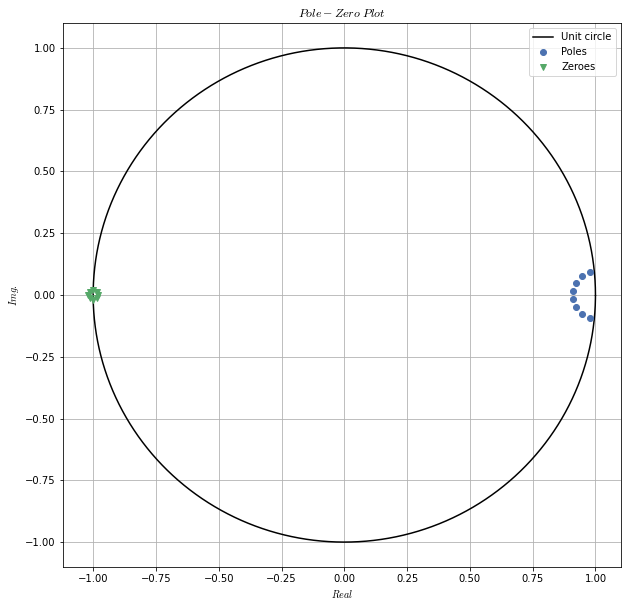

In [12]:
fig = plt.figure(figsize=(10, 10))
plot_figure(poles, zeroes, xaxis_label=r'$Real$', yaxis_label=r'$Img.$', row=0)
plt.grid()
fig.savefig('fig1.png')

In [14]:
def plot_signal(x, y, xaxis_label=None, yaxis_label=None, row=None):  
    axs[row].grid(b=True, which='major', linestyle='-')
    axs[row].grid(b=True, which='minor', linestyle='-')
    axs[row].minorticks_on()
    if row == 0:
      axs[row].semilogx(freq*(Fs/(2*np.pi)), 20*np.log10(np.abs(mag)))
    else:
      axs[row].semilogx(freq*(Fs/(2*np.pi)), np.unwrap(np.angle(mag))) 

    axs[row].set_title(title[row])
    axs[row].set_xlabel(xaxis_label)
    axs[row].set_ylabel(yaxis_label)
    axs[row].tick_params(axis="both")
    fig.tight_layout()

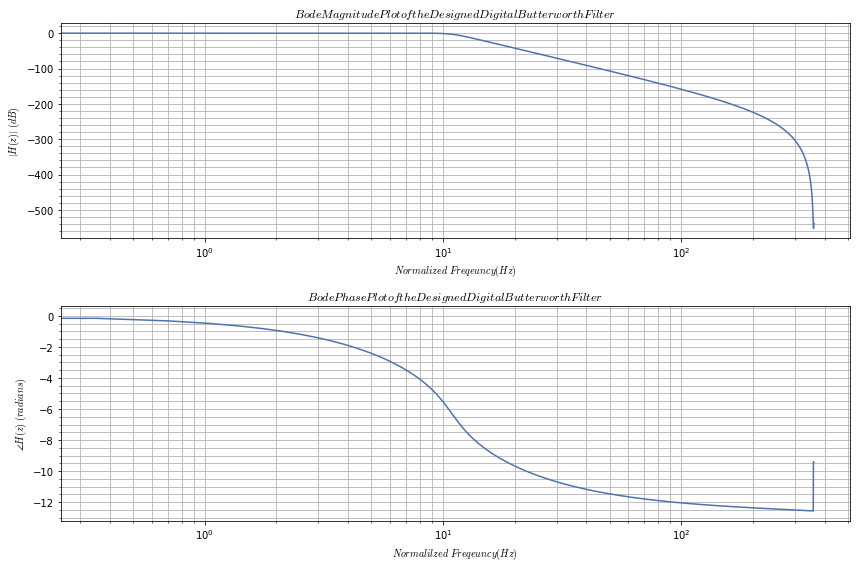

In [18]:
freq, mag = sp.freqz(num, denom, 1024)

title = ['$Bode Magnitude Plot of the Designed Digital Butterworth Filter$', '$Bode Phase Plot of the Designed Digital Butterworth Filter$']
fig, axs = plt.subplots(2, figsize=(12, 8))
plot_signal(freq, mag, xaxis_label=r'$Normalized\ Freqeuncy(Hz)$', yaxis_label=r'$|H(z)|\ (dB)$', row=0)
plot_signal(freq, mag, xaxis_label=r'$Normalilzed\ Freqeuncy(Hz)$', yaxis_label=r'$\angle H(z)\ (radians)$', row=1)

Text(0.5, 1.0, 'Step response of the transfer function using Butterworth filter')

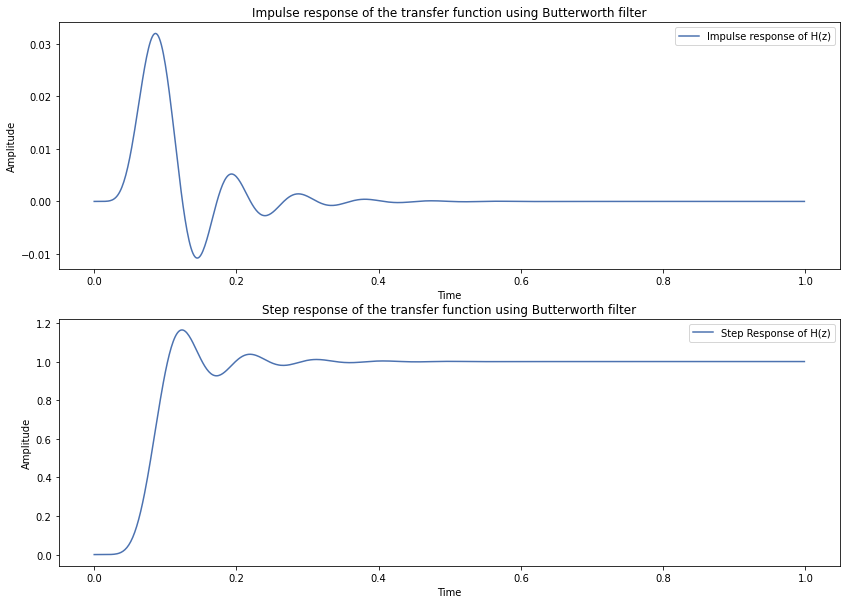

In [20]:
#Impulse and step response
t = np.arange(0, 1, 1/Fs)
impulse = np.hstack((np.array([1]),np.zeros(Fs - 1)))
step = np.ones(Fs)
num, den =sp.bilinear(n, d, fs=Fs)
y1=sp.lfilter(num, den, impulse)
y2=sp.lfilter(num, den, step)

plt.figure(figsize= (14,10))
plt.subplot(2,1,1)
plt.plot(t,y1,label = "Impulse response of H(z)")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend(loc = 'upper right')
plt.title("Impulse response of the transfer function using Butterworth filter")

plt.subplot(2,1,2)
plt.plot(t,y2,label = "Step Response of H(z)")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend(loc = 'upper right')
plt.title("Step response of the transfer function using Butterworth filter")

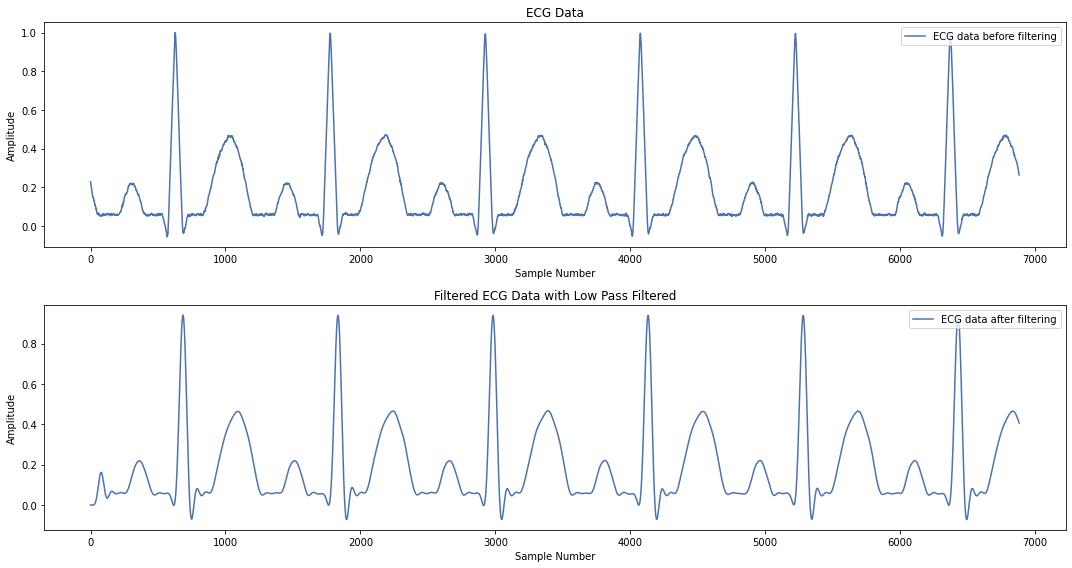

In [24]:
#Filtering 
ecg = np.loadtxt("ECG_Data.txt")
ecg_filtered = sp.lfilter(num, den, ecg)

plt.figure(figsize = (15,8))
plt.subplot(2,1,1)
plt.plot(ecg,label = "ECG data before filtering")
plt.xlabel("Sample Number")
plt.ylabel("Amplitude")
plt.title("ECG Data")
plt.legend(loc = 'upper right')
plt.subplot(2,1,2)
plt.plot(ecg_filtered,label = "ECG data after filtering")
plt.xlabel("Sample Number")
plt.ylabel("Amplitude")
plt.legend(loc = 'upper right')
plt.title("Filtered ECG Data with Low Pass Filtered")
plt.tight_layout()

In [26]:
def plot_mag(x, Fs,norm = True, max_freq=None,Title = None, interpolate = True):
    
    C = int(len(x) / 2)
    if max_freq:
        C = int(C * max_freq / float(Fs) * 2) 
        
    X = (np.abs(np.fft.fft(x)[0:C]))
    N = Fs * np.arange(0, C) / len(x)
    
    X_norm = X
    if norm:
        X_norm = (1/C) * X;
    if interpolate:
        plt.plot(N, X_norm)
    else:
        plt.stem(N, X_norm)
    if Title:
            plt.title(Title)
        
    return N, X_norm

Text(0, 0.5, 'Magnitude')

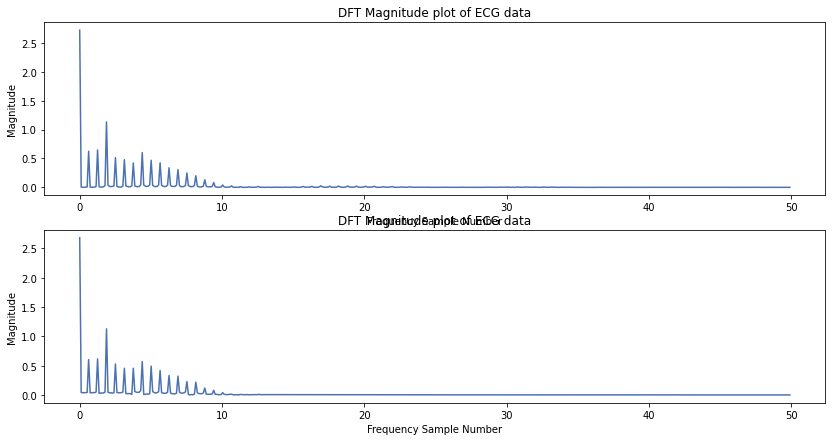

In [27]:
plt.figure(figsize = (14,7))
plt.subplot(2,1,1)
_,_ = plot_mag(ecg, Fs,max_freq = 50, norm = True,Title = "DFT Magnitude plot of ECG data")
plt.xlabel("Frequency Sample Number")
plt.ylabel("Magnitude")
plt.subplot(2,1,2)
_,_ = plot_mag(ecg_filtered, Fs,max_freq = 50, norm = True,Title = "DFT Magnitude plot of ECG data")
plt.xlabel("Frequency Sample Number")
plt.ylabel("Magnitude")

## Problem 3

In [28]:
def plot_spectro(x, Fs, Window,samples, Nperseg, Noverlap):
    
    ft, tx, Sx = sp.spectrogram(x,Fs, window = Window,nperseg = Nperseg, noverlap = Noverlap)
    
    if samples:
        plt.pcolormesh(tx[0:samples],ft[0:samples], Sx[0:samples][0:samples], shading = 'gouraud')
    else:
        plt.pcolormesh(tx,ft,Sx, shading = 'gouraud')
        
    cbar = plt.colorbar()
    cbar.set_label('Amplitude')
    cbar.minorticks_on()
    plt.xlabel("Time(sec)")
    plt.ylabel("Frequency(Hz)")
    
    return tx,ft,Sx

In [30]:
Fs_instru, track= wavfile.read('instru1.wav')
track = track/32767.0
print('Sampling rate of instrument : {}Hz'.format(Fs_instru))
print('Size of instrument signal: {}'.format(track.shape))
IPython.display.Audio(track, rate = Fs_instru)

Sampling rate of instrument : 11025Hz
Size of instrument signal: (36250,)


Text(0.5, 1.0, 'Spectrogram of the instrument audio track')

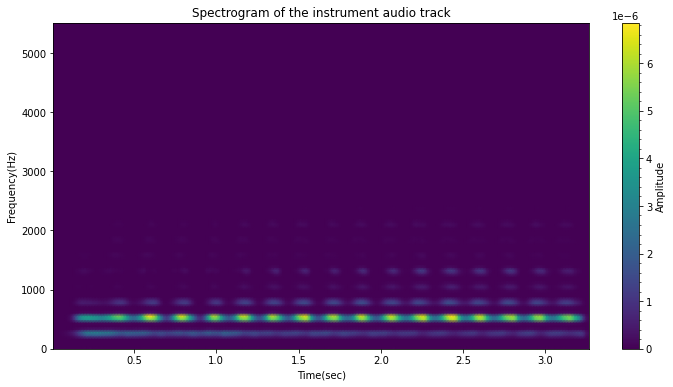

In [41]:
t,f,S = plot_spectro(track, Fs = Fs_instru, Window = 'hanning',samples = None,Nperseg = 200,Noverlap = 10)
plt.title("Spectrogram of the instrument audio track")

In [42]:
peak, _= sp.find_peaks(S[:,10],threshold = 1e-8)
print("Frequencies present:",f[peak])

Frequencies present: [ 275.625  551.25   771.75  1047.375 1323.    1598.625 2094.75 ]


In [43]:
wp1 = 2*pi*500
wp2 = 2*pi*1000
ws1 = 2*pi*250
ws2 = 2*pi*1250

Pg = 3
Ps = 40
Fs = 11025


G = 10**(-Pg/20)                       #Pg = 20*log(base10)(G)
S = 10**(-Ps/20)                       #Ps = 20*log(base10)(S)

eps = np.sqrt( (1-G**2)/G**2 )

print("Passband gain: {}\nStopband gain: {}\nEpsilon: {}".format(G,S,eps))

Passband gain: 0.7079457843841379
Stopband gain: 0.01
Epsilon: 0.9976283451109835


In [44]:
omega_p1=wp1/Fs
omega_p2=wp2/Fs
omega_s1=ws1/Fs
omega_s2=ws2/Fs
Omega_p1=(2*Fs)*np.tan(omega_p1/2)
Omega_s1=(2*Fs)*np.tan(omega_s1/2)
Omega_p2=(2*Fs)*np.tan(omega_p2/2)
Omega_s2=(2*Fs)*np.tan(omega_s2/2)
print("Pre warped pass band frequencies are:{} rad/s and {} rad/s".format(Omega_p1,Omega_p2))
print("Pre warped stop band frequencies are:{} rad/s and {} rad/s".format(Omega_s1,Omega_s2))

Pre warped pass band frequencies are:3163.024139153343 rad/s and 6458.95598052781 rad/s
Pre warped stop band frequencies are:1573.458913116232 rad/s and 8203.897779851713 rad/s


In [45]:
N, Omega_c=sp.buttord([Omega_p1, Omega_p2],[Omega_s1,Omega_s2], Pg, Ps , analog=True)
n, d = sp.butter(N, Omega_c, btype='bandpass', analog=True, output='ba')
num, den =sp.bilinear(n, d, fs=Fs)
print("Order of the filter:",N)

Order of the filter: 9


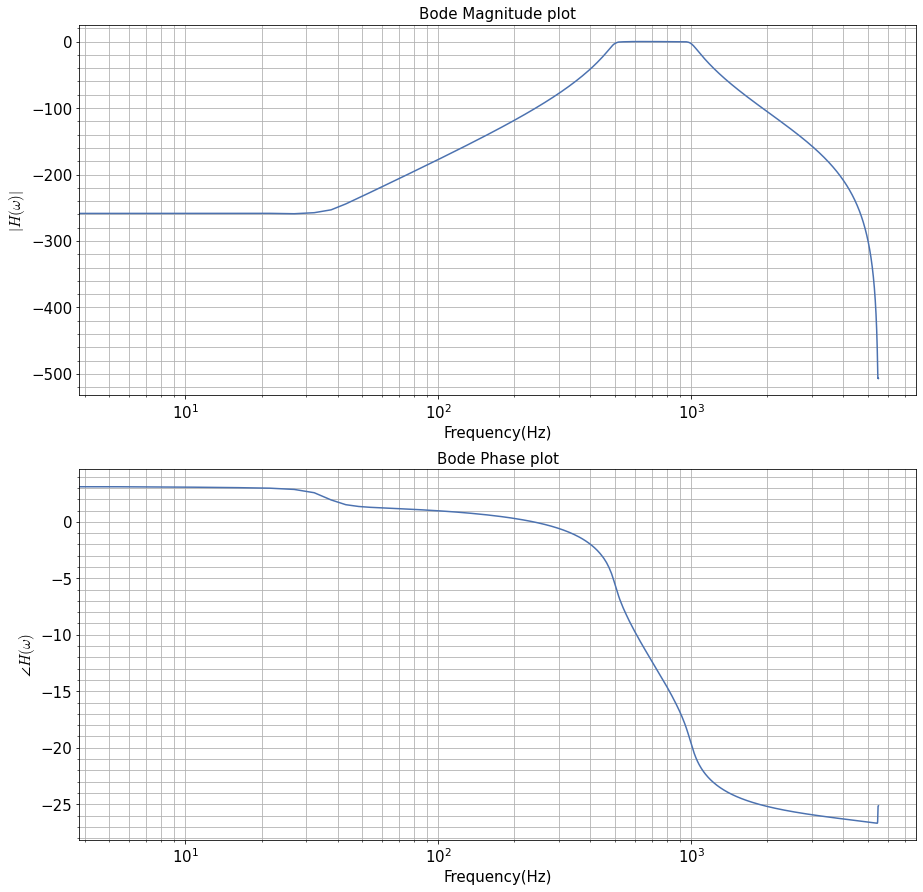

In [47]:
freq, mag = sp.freqz(num, den, 1024)
fig, axs = plt.subplots(2, figsize = (15,15))
title = ['$Bode\ Magnitude\ Plot\ of\ the\ Designed\ Digital\ Butterworth\ Filter$', '$Bode\ Phase\ Plot\ of\ the\ Designed\ Digital\ Butterworth\ Filter$']

def plot_bode(frequency, mag,title=None,x_label=None,y_label=None,row= None):
    
    axs[row].grid(b=True, which='major', linestyle='-')
    axs[row].grid(b=True, which='minor', linestyle='-')
    axs[row].minorticks_on()
    if row == 0:
      axs[row].semilogx(freq*(Fs/(2*np.pi)), 20*np.log10(np.abs(mag)))
    else:
      axs[row].semilogx(freq*(Fs/(2*np.pi)), np.unwrap(np.angle(mag))) 

    axs[row].set_title(title, fontsize = 15)
    axs[row].set_xlabel(x_label, fontsize = 15)
    axs[row].set_ylabel(y_label, fontsize = 15)
    axs[row].tick_params(axis="both", labelsize = 15)

plot_bode(freq,mag,title = "Bode Magnitude plot", x_label = "Frequency(Hz)",y_label = r"$|H(\omega)|$",row = 0)
plot_bode(freq,mag,title = "Bode Phase plot", x_label = "Frequency(Hz)",y_label = r"$\angle H(\omega)$",row = 1)

In [50]:
track_filtered = sp.lfilter(num, den, track)
wavfile.write("filtered_track.wav", Fs, track_filtered)
IPython.display.Audio(track_filtered, rate = Fs)

Text(0.5, 1.0, 'Spectrogram of the filtered audio track')

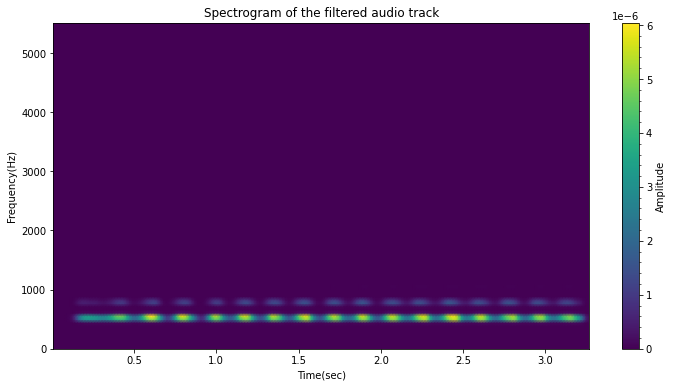

In [51]:
t,f,S = plot_spectro(track_filtered, Fs = Fs, Window = 'hanning',samples = None,Nperseg = 200,Noverlap = 10)
plt.title("Spectrogram of the filtered audio track")

In [52]:
# Designing with same specifications using Type 1 Chebyshev filter
wp = 2*pi*10
ws = 2*pi*20

Pg = alpha
Ps = 40
Fs = 720

G = 10**(-2/20)                        #Pg = 20*log(base10)(G)
S = 10**(-40/20)                       #Ps = 20*log(base10)(S)
print("Passband gain: {}\nStopband gain: {}".format(G,S))

Passband gain: 0.7943282347242815
Stopband gain: 0.01


In [53]:
#Performing pre warping
omega_p=wp/Fs
omega_s=ws/Fs
Omega_p1=(2*Fs)*np.tan(omega_p/2)
Omega_s1=(2*Fs)*np.tan(omega_s/2)
print("Pre warped passband and stop band frequencies:{} rad/s and {} rad/s".format(Omega_p1,Omega_s1))

Pre warped passband and stop band frequencies:62.87175778825736 rad/s and 125.98367547733056 rad/s


In [54]:
N, Omega_c=sp.cheb1ord(Omega_p1, Omega_s1, Pg, Ps, analog=True)
n, d = sp.cheby1(N, Pg, Omega_c, btype='low', analog=True, output='ba')
nums, dens=sp.bilinear(n, d, fs=Fs)
print("Order of the filter:",N)

Order of the filter: 5


In [55]:
print('H(z) = {}'.format(control.TransferFunction(n, d, dt=True)))

H(z) = 
                             1.207e+08
-------------------------------------------------------------------
z^5 + 58.9 z^4 + 6676 z^3 + 2.422e+05 z^2 + 9.071e+06 z + 1.207e+08



In [57]:
def pole_zero_plot(pole,zero):
    plt.plot(np.cos(theta),np.sin(theta),label = "Unit circle")
    plt.plot(np.real(pole),np.imag(pole),'rx',label = "Poles")
    plt.plot(np.real(zero),np.imag(zero),'go',label = "Zeros")
    plt.xlabel("Real axis")
    plt.ylabel("Imaginary Axis")
    plt.title("Pole Zero plot of the transfer function")
    plt.legend(loc = 'upper right')
    plt.tick_params(axis = 'both')

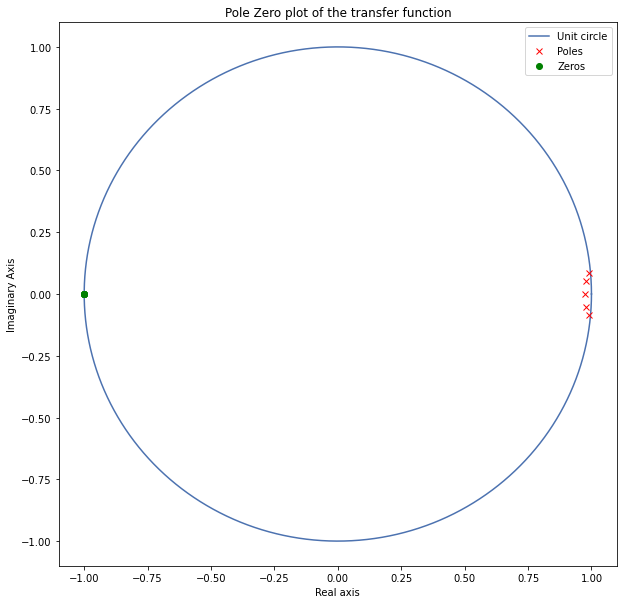

In [61]:
z,p,k = sp.cheby1(N, Pg,Omega_c, btype='low', analog=True, output='zpk')
zeros,poles,gain =sp.bilinear_zpk(z,p,k, fs=Fs)
theta = np.arange(0,2*pi, 0.0001)

plt.figure(figsize = (10,10))
pole_zero_plot(poles, zeros)
plt.savefig('zpk_plot_cheby.png')

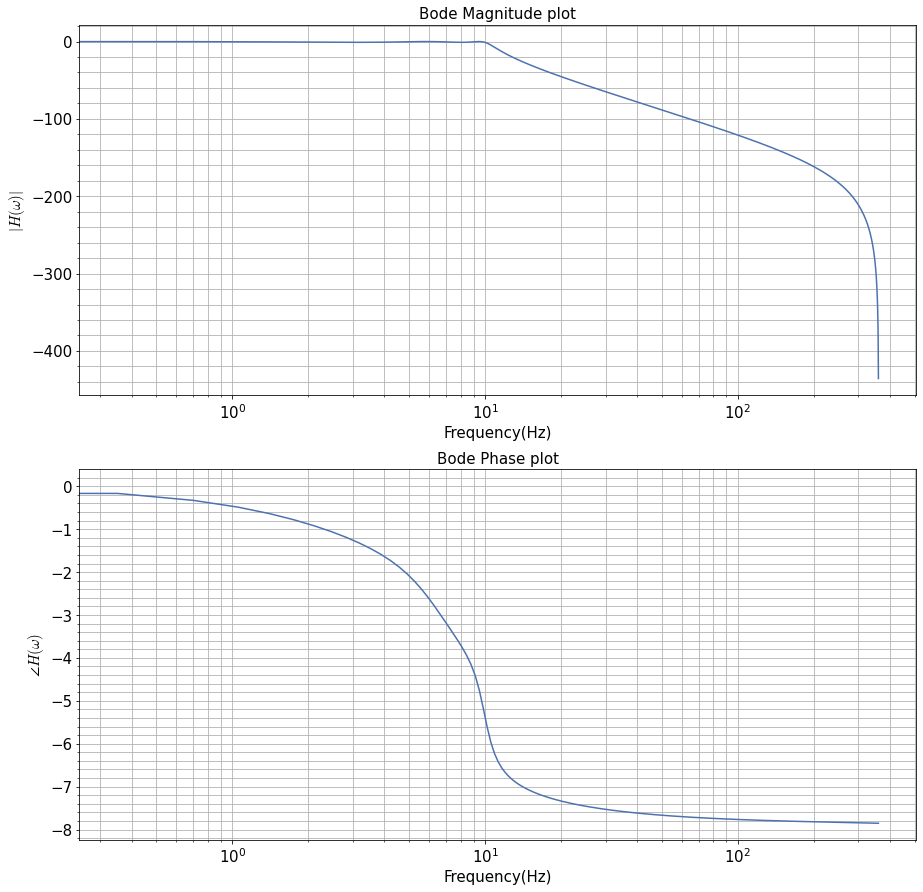

In [62]:
freq, mag = sp.freqz(nums, dens, 1024)
fig, axs = plt.subplots(2, figsize = (15,15))
title = ['$Bode\ Magnitude\ Plot\ of\ the\ Designed\ Digital\ Butterworth\ Filter$', '$Bode\ Phase\ Plot\ of\ the\ Designed\ Digital\ Butterworth\ Filter$']
    
plot_bode(freq,mag,title = "Bode Magnitude plot", x_label = "Frequency(Hz)",y_label = r"$|H(\omega)|$",row = 0)
plot_bode(freq,mag,title = "Bode Phase plot", x_label = "Frequency(Hz)",y_label = r"$\angle H(\omega)$",row = 1)

Text(0.5, 1.0, 'Step response of the transfer function using Chebyshev filter')

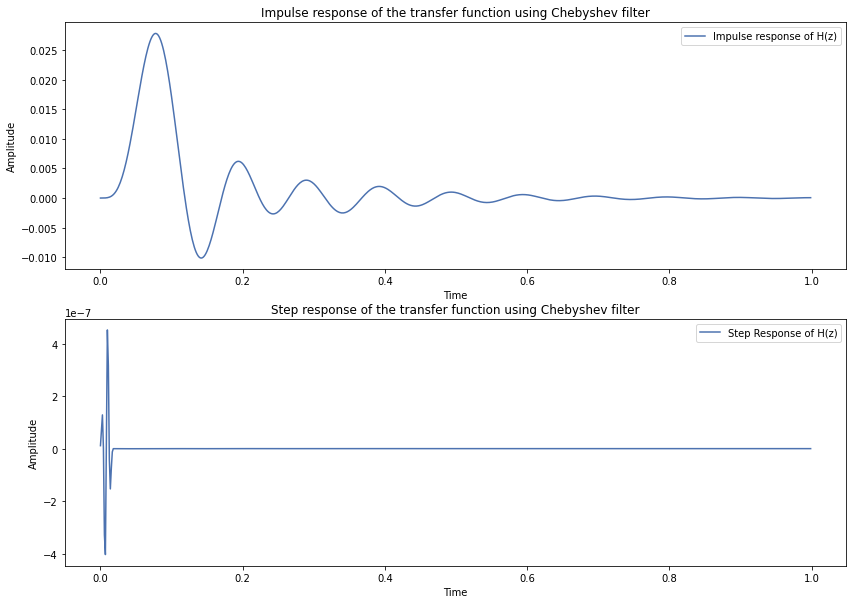

In [63]:
t = np.arange(0, 1, 1/Fs)
impulse = np.hstack((np.array([1]),np.zeros(Fs - 1)))
step = np.ones(Fs)

y1=sp.lfilter(nums, dens, impulse)
y2=sp.lfilter(num, dens, step)

plt.figure(figsize= (14,10))
plt.subplot(2,1,1)
plt.plot(t,y1,label = "Impulse response of H(z)")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend(loc = 'upper right')
plt.title("Impulse response of the transfer function using Chebyshev filter")

plt.subplot(2,1,2)
plt.plot(t,y2,label = "Step Response of H(z)")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend(loc = 'upper right')
plt.title("Step response of the transfer function using Chebyshev filter")